# Four components
Recall that there are four key components to supervised learning: the data, the model, the cost function, and the optimizer. Let's inspect these one at a time.

## 1. The data

### (1) Download and prepare the data

In [ ]:
import pandas
import urllib.request

# Download the files using urllib
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py",
    "m0b_optimizer.py"
)
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv",
    "seattleWeather_1948-2017.csv"
)

# Load a file that contains weather data for Seattle
data = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

# Keep only January temperatures
data = data[[d.month == 1 for d in data.date]].copy()

# Print the first and last few rows
# Remember that with Jupyter notebooks, the last line of
# code is automatically printed
data

### (2) Analyze the data

In [ ]:
import matplotlib.pyplot as plt

# Let's take a quick look at our data

plt.scatter(data["date"], data["min_temperature"])

# add labels and legend
plt.xlabel("date")
plt.ylabel("min_temperature")
plt.title("January Temperatures (°F)")
plt.legend()

### (3) Scale the data

In [ ]:
import numpy as np

# This block of code scales and offsets the data slightly, which helps the training process
# You don't need to understand this code. We'll cover these concepts in later learning material

# Offset date into number of years since 1982
data["years_since_1982"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

# Scale and offset temperature so that it has a smaller range of values
data["normalised_temperature"] = (data["min_temperature"] - np.mean(data["min_temperature"])) / np.std(data["min_temperature"])

# Graph
plt.scatter(data["years_since_1982"], data["normalised_temperature"])
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.title("January Temperatures (Normalised)")
plt.legend()

## 2. The model

Model made!
Model parameters before training: 0, 0
Model visualised before training:


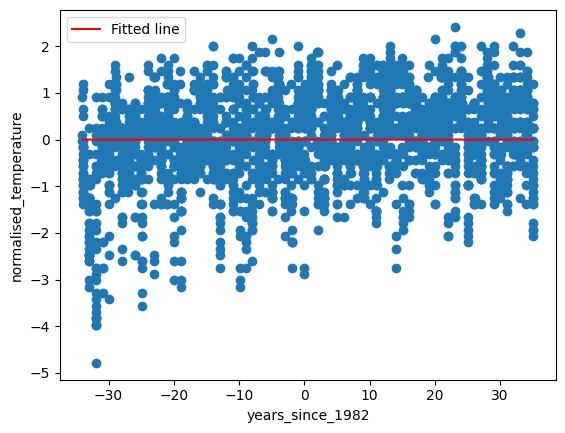

In [18]:
# select a simple linear-regression model.

class MyModel:

    def __init__(self):
        '''
        Creates a new MyModel
        '''
        # Straight lines described by two parameters:
        # The slope is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0

    def predict(self, date):
        '''
        Estimates the temperature from the date
        '''
        # print(f"date: {date}")
        prediction = date * self.slope + self.intercept
        # print(f"prediction: {prediction}")
        return prediction

# Create our model ready to be trained
model = MyModel()

print("Model made!")


# We wouldn't normally use a model before it's been trained, but for the sake of learning, let's take a quick look at it.

print(f"Model parameters before training: {model.intercept}, {model.slope}")

# Look at how well the model does before training
print("Model visualised before training:")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')


# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()

## 3. The cost (objective) function

In [ ]:
def cost_function(actual_temperatures, estimated_temperatures):
    '''
    Calculates the difference between actual and estimated temperatures
    Returns the difference, and also returns the squared difference (the cost)

    actual_temperatures: One or more temperatures recorded in the past
    estimated_temperatures: Corresponding temperature(s) estimated by the model
    '''

    # Calculate the difference between actual temperatures and those
    # estimated by the model
    difference = estimated_temperatures - actual_temperatures

    # Convert to a single number that tells us how well the model did
    # (smaller numbers are better)
    cost = sum(difference ** 2)

    return difference, cost

## 4. The optimizer

In [ ]:
from m0b_optimizer import MyOptimizer

# Create an optimizer
optimizer = MyOptimizer()

# The training loop

### make a function that performs one iteration of training

In [ ]:
def train_one_iteration(model_inputs, true_temperatures, last_cost:float):
    '''
    Runs a single iteration of training.


    model_inputs: One or more dates to provide the model (dates)
    true_temperatues: Corresponding temperatures known to occur on those dates

    Returns:
        A Boolean, as to whether training should continue
        The cost calculated (small numbers are better)
    '''

    # === USE THE MODEL ===
    # Estimate temperatures for all data that we have
    estimated_temperatures = model.predict(model_inputs)

    # === OBJECTIVE FUNCTION ===
    # Calculate how well the model is working
    # Smaller numbers are better
    difference, cost = cost_function(true_temperatures, estimated_temperatures)

    # Decide whether to keep training
    # We'll stop if the training is no longer improving the model effectively
    if cost >= last_cost:
        # Stop training
        return False, cost
    else:
        # === OPTIMIZER ===
        # Calculate updates to parameters
        intercept_update, slope_update = optimizer.get_parameter_updates(model_inputs, cost, difference)

        # Change the model parameters
        model.slope += slope_update
        model.intercept += intercept_update

        return True, cost

print("Training method ready")

###  run a few iterations manually

In [15]:
import math

print(f"Model parameters before training:\t\t{model.intercept:.8f},\t{model.slope:.8f}")

continue_loop, cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                          true_temperatures = data["normalised_temperature"],
                                          last_cost = math.inf)

print(f"Model parameters after 1 iteration of training:\t{model.intercept:.8f},\t{model.slope:.8f}")


Model parameters before training:		0.00000000,	0.00000000
date: 0       -33.997262
1       -33.994524
2       -33.991786
3       -33.989049
4       -33.986311
           ...    
25229    35.073922
25230    35.076660
25231    35.079398
25232    35.082136
25233    35.084873
Name: years_since_1982, Length: 2170, dtype: float64
Model parameters after 1 iteration of training:	0.00000000,	0.01006832


### take thousands of iterations to train the model

Training beginning...
Iteration: 0
Iteration: 400
Iteration: 800
Iteration: 1200
Iteration: 1600
Iteration: 2000
Iteration: 2400
Iteration: 2800
Iteration: 3200
Iteration: 3600
Iteration: 4000
Iteration: 4400
Iteration: 4800
Training complete!
Model parameters after training:	-0.00648923,	0.01193327


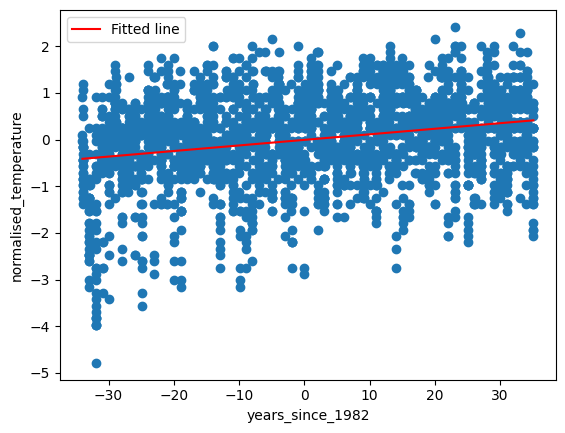

In [19]:

# Start the loop
print("Training beginning...")
last_cost = math.inf
i = 0
continue_loop = True
while continue_loop:

    # Run one iteration of training
    # This will tell us whether to stop training, and also what
    # the cost was for this iteration
    continue_loop, last_cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                   true_temperatures = data["normalised_temperature"],
                                                   last_cost = last_cost)

    # Print the status
    if i % 400 == 0:
        print("Iteration:", i)

    i += 1


print("Training complete!")
print(f"Model parameters after training:\t{model.intercept:.8f},\t{model.slope:.8f}")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')

# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()